In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 

In [2]:
DATA_DIR = "/kaggle/input/starbucks-customer-retention-malaysia-survey/Starbucks satisfactory survey encode cleaned.csv"

In [3]:
df = pd.read_csv(DATA_DIR, index_col='Id')
df.head()

,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,itemPurchaseCoffee,...,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal
Id,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,0,3,0,1,0,0,1,...,3,1,1,1,1,1,1,1,1,0
2,1,1,0,0,3,2,0,1,0,1,...,2,1,1,1,1,1,1,1,1,0
3,0,1,2,0,2,0,1,2,0,1,...,3,1,1,1,1,1,1,1,1,0
4,1,1,0,0,3,2,0,2,1,1,...,3,1,1,1,1,1,1,1,1,1
5,0,1,0,0,2,2,1,1,1,1,...,3,1,1,1,1,1,1,1,1,0


In [4]:
len(df.columns)

32

In [5]:
X = df.drop(['loyal'], axis=1)
y = df['loyal']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [7]:
dt_clf = tree.DecisionTreeClassifier(random_state=1234)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1234)

In [8]:
dt_clf.score(X_test, y_test)

0.75

In [9]:
dot_data = tree.export_graphviz(dt_clf, out_file=None, feature_names=X.columns,class_names=['0','1'],filled=True, rounded=True) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

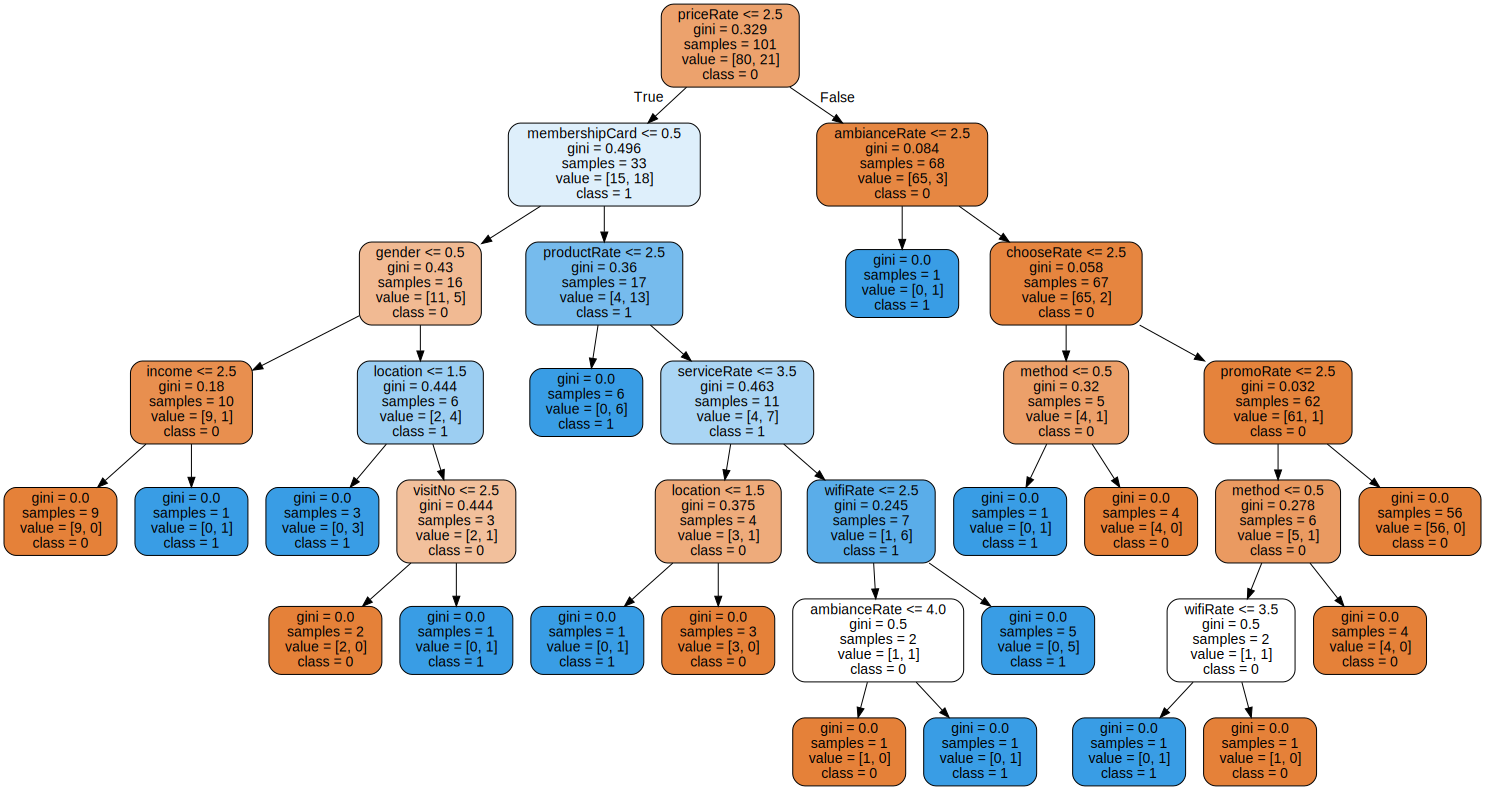

In [10]:
graph

In [14]:
importance = dt_clf.feature_importances_

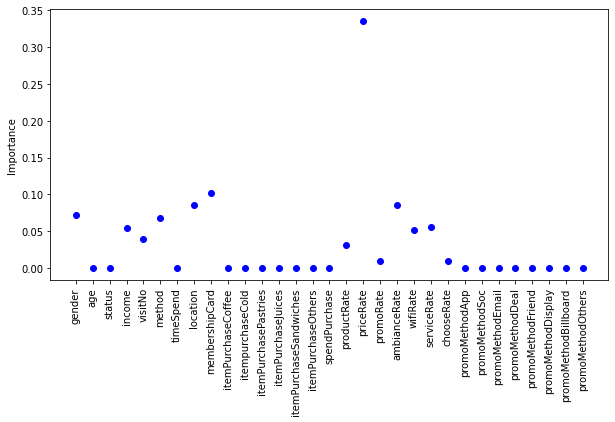

In [30]:
plt.figure(figsize=(10, 5))

plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.plot(X.columns,importance,'bo')

`priceRate`, `ambienceRate` ,`membershipCard` and `location` are the most important features that determine loyality according to decision trees here. The `priceRate` is far more important than all other features and then secondly `ambienceRate` comes next.